In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
# Step 1: Load the dataset
df = pd.read_csv('comprehensive_mutual_funds_data.csv')

In [4]:
# Step 2: Data Preprocessing

# Replace non-numeric values (like '-') with NaN
df.replace('-', np.nan, inplace=True)

# Convert the columns to numeric, coercing errors to NaN (e.g., for non-numeric entries)
numeric_columns = ['min_sip', 'min_lumpsum', 'expense_ratio', 'fund_size_cr', 'fund_age_yr', 
                   'sortino', 'alpha', 'sd', 'beta', 'sharpe', 'risk_level']  # adjust if necessary

# Convert all specified columns to numeric, invalid parsing will be set as NaN
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Handle missing values by either dropping or filling
# Drop rows with NaN values in the relevant columns
df.dropna(subset=numeric_columns, inplace=True)

In [5]:
# Step 3: Prepare features and target variable
# Let's predict 1-year returns (you can change this to 'returns_3yr' or 'returns_5yr' if needed)
features = df[['min_sip', 'min_lumpsum', 'expense_ratio', 'fund_size_cr', 'fund_age_yr', 'sortino', 
               'alpha', 'sd', 'beta', 'sharpe', 'risk_level']]  # Features

In [6]:
# Target: 1-year return (adjust as needed)
target_1Y = df['returns_1yr']

In [7]:
# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target_1Y, test_size=0.2, random_state=42)


In [8]:
# Step 5: Feature scaling (important for certain models like SVM, KNN, etc.)
scaler = StandardScaler()

In [9]:
# Fit and transform the training data, and transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Step 6: Model Selection and Training (Random Forest Regressor)
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [11]:
# Fit the model on the scaled training data
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [12]:
# Step 7: Model Evaluation
y_pred = model.predict(X_test_scaled)

In [13]:
# Evaluate model accuracy
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [14]:
# Print model evaluation metrics
print("R^2:", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

R^2: 0.4674661799419114
Mean Absolute Error (MAE): 2.007587096774194
Mean Squared Error (MSE): 12.49587095483871


In [15]:
# Optionally, you can use cross-validation to further evaluate the model
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')
print("Cross-validation MAE scores:", cv_scores)
print("Average Cross-validation MAE:", cv_scores.mean())

Cross-validation MAE scores: [-3.43297581 -1.9370813  -1.87146341 -2.56750407 -2.28419512]
Average Cross-validation MAE: -2.4186439417781274


In [16]:
# Step 8: Feature Importance (Optional)
# RandomForest provides feature importance which can be useful to interpret the model
importances = model.feature_importances_
print("Feature Importances:", importances)

Feature Importances: [0.01399116 0.00934688 0.05608601 0.04091079 0.01958072 0.08465023
 0.25946816 0.34222529 0.10330856 0.04890664 0.02152555]


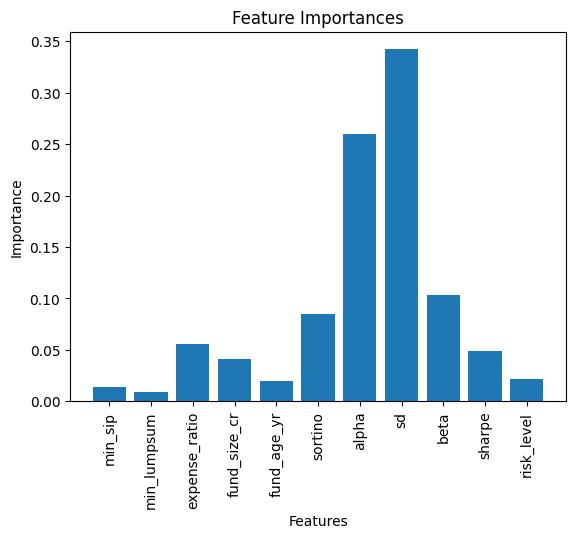

In [18]:
# Visualize the feature importances using a bar plot
plt.bar(features.columns, importances)
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.show()